#Proyecto Telecom X Segunda parte

Se nos plantea un nuevo escenario: Hemos sido promovidos después del excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X.

Ahora, hemos sido invitados oficialmente a formar parte del equipo de Machine Learning de la empresa, nuestra nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y nos corresponde construir un pipeline robusto para esta etapa inicial de modelado.

#Extracción de datos

Importando datos y leyendo el dataset de la primera parte del proyecto

In [25]:
import pandas as pd

link = 'https://raw.githubusercontent.com/leonel-robles/Modelo_Predictivo_Evasion-de-Clientes/refs/heads/main/data/Telecom_X'
datos = pd.read_csv(link)
datos.head()

,ID_Cliente,Abandono,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#Eliminación de Columnas Irrelevantes

Eliminaremos las columnas que no aportan valor al análisis y a los modelos predictivos, como los identificadores únicos (ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [26]:
datos.drop('ID_Cliente', axis=1, inplace=True)
datos.head()

,Abandono,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#Encoding

Transformaremos las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utilizaremos el método de codificación one-hot encoding.

In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abandono                7267 non-null   int64  
 1   Genero                  7267 non-null   object 
 2   Ciudadano_Mayor         7267 non-null   int64  
 3   Pareja                  7267 non-null   int64  
 4   Dependientes            7267 non-null   int64  
 5   Antiguedad              7267 non-null   int64  
 6   Servicio_Telefonico     7267 non-null   int64  
 7   Varias_Lineas           7267 non-null   int64  
 8   Servicio_Internet       7267 non-null   object 
 9   Seguridad_Online        7267 non-null   int64  
 10  Copia_Seguridad_Online  7267 non-null   int64  
 11  Proteccion_Dispositivo  7267 non-null   int64  
 12  Soporte_Tecnico         7267 non-null   int64  
 13  Streaming_TV            7267 non-null   int64  
 14  Streaming_Peliculas     7267 non-null   

In [28]:
datos = pd.get_dummies(datos, columns=['Genero', 'Servicio_Telefonico', 'Varias_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Metodo_Pago'])
datos.head()

,Abandono,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Facturacion_Sin_Papel,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Genero_Female,...,Streaming_TV_1,Streaming_Peliculas_0,Streaming_Peliculas_1,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Metodo_Pago_Bank transfer (automatic),Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,1,1,9,1,65.6,593.30,2.19,True,...,True,True,False,False,True,False,False,False,False,True
1,0,0,0,0,9,0,59.9,542.40,2.00,False,...,False,False,True,True,False,False,False,False,False,True
2,1,0,0,0,4,1,73.9,280.85,2.46,False,...,False,True,False,True,False,False,False,False,True,False
3,1,1,1,0,13,1,98.0,1237.85,3.27,False,...,True,False,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,83.9,267.40,2.80,True,...,True,True,False,True,False,False,False,False,False,True


In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Abandono                               7267 non-null   int64  
 1   Ciudadano_Mayor                        7267 non-null   int64  
 2   Pareja                                 7267 non-null   int64  
 3   Dependientes                           7267 non-null   int64  
 4   Antiguedad                             7267 non-null   int64  
 5   Facturacion_Sin_Papel                  7267 non-null   int64  
 6   Cargos_Mensuales                       7267 non-null   float64
 7   Cargos_Totales                         7267 non-null   float64
 8   Cuentas_Diarias                        7267 non-null   float64
 9   Genero_Female                          7267 non-null   bool   
 10  Genero_Male                            7267 non-null   bool   
 11  Serv

#Verificación de la Proporción de Cancelación (Churn)

Calcularemos la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúaremos si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [30]:
churn_proportion = datos['Abandono'].value_counts(normalize=True)
print(churn_proportion)

if churn_proportion.min() < 0.3:
    print("\nAdvertencia: Existe un desbalance significativo en las clases.")
else:
    print("\nLas clases están relativamente balanceadas.")

Abandono
0    0.74281
1    0.25719
Name: proportion, dtype: float64

Advertencia: Existe un desbalance significativo en las clases.


# Separación de Datos

Dividiremos el conjunto de datos en conjuntos de entrenamiento (80%) y prueba (20%) para evaluar el rendimiento del modelo de manera imparcial. Se aplicará estratificación para mantener la proporción de la variable objetivo en ambos conjuntos.

In [31]:
from sklearn.model_selection import train_test_split

X = datos.drop('Abandono', axis=1)
y = datos['Abandono']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (5813, 36)
Tamaño del conjunto de prueba: (1454, 36)


# Balanceo de Clases con SMOTE

Para abordar el desbalance significativo en las clases, aplicaremos SMOTE (Synthetic Minority Over-sampling Technique) al conjunto de entrenamiento (`X_train`, `y_train`). SMOTE genera ejemplos sintéticos de la clase minoritaria para igualar su número con la clase mayoritaria.

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Tamaño del conjunto de entrenamiento después de SMOTE:", X_train_res.shape)
print("Distribución de clases en el conjunto de entrenamiento después de SMOTE:")
print(y_train_res.value_counts())

Tamaño del conjunto de entrenamiento después de SMOTE: (8636, 36)
Distribución de clases en el conjunto de entrenamiento después de SMOTE:
Abandono
0    4318
1    4318
Name: count, dtype: int64


# Normalización de los datos

Escalaremos las características numéricas para asegurar que tengan un rango similar, lo que puede mejorar el rendimiento de algunos algoritmos de machine learning. Utilizaremos `StandardScaler` para estandarizar los datos (media 0, desviación estándar 1).

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Identify numerical columns to scale
numerical_cols_to_scale = ['Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']

X_train_res[numerical_cols_to_scale] = scaler.fit_transform(X_train_res[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

display(X_train_res.head())
display(X_test.head())

,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Facturacion_Sin_Papel,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Genero_Female,Genero_Male,...,Streaming_TV_1,Streaming_Peliculas_0,Streaming_Peliculas_1,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Metodo_Pago_Bank transfer (automatic),Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,1,1,0.642520,1,-1.529812,-0.483555,-1.524417,True,False,...,False,True,False,False,True,False,True,False,False,False
1,0,1,0,-0.275707,1,0.636361,-0.108352,0.632833,True,False,...,False,False,True,True,False,False,False,False,True,False
2,0,1,1,1.143371,0,0.601451,1.227988,0.601417,False,True,...,False,False,True,True,False,False,True,False,False,False
3,0,1,1,0.725995,1,-1.685162,-0.532667,-1.681498,True,False,...,False,True,False,False,False,True,True,False,False,False
4,0,1,1,1.477271,1,0.805675,1.711650,0.800386,False,True,...,False,False,True,False,True,False,False,False,True,False


,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Facturacion_Sin_Papel,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Genero_Female,Genero_Male,...,Streaming_TV_1,Streaming_Peliculas_0,Streaming_Peliculas_1,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Metodo_Pago_Bank transfer (automatic),Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
4272,0,1,1,-0.901770,0,-0.431889,-0.772381,-0.435320,True,False,...,False,True,False,True,False,False,False,True,False,False
4764,0,0,1,-1.110458,1,0.873750,-0.897541,0.873691,False,True,...,True,False,True,True,False,False,False,False,True,False
5373,0,0,1,0.475570,0,-0.810663,-0.116679,-0.812315,False,True,...,True,True,False,False,True,False,True,False,False,False
5070,0,0,0,-0.985246,0,-0.576766,-0.847947,-0.581929,False,True,...,False,True,False,True,False,False,False,True,False,False
5721,0,1,1,-0.901770,0,-0.967759,-0.840402,-0.969396,True,False,...,False,True,False,False,False,True,False,False,False,True


# Visualización de la Matriz de Correlación

Visualizaremos la matriz de correlación para identificar relaciones entre las variables numéricas. Si hay variables que muestran una mayor correlación con la cancelación, estas pueden ser fuertes candidatas para el modelo predictivo.

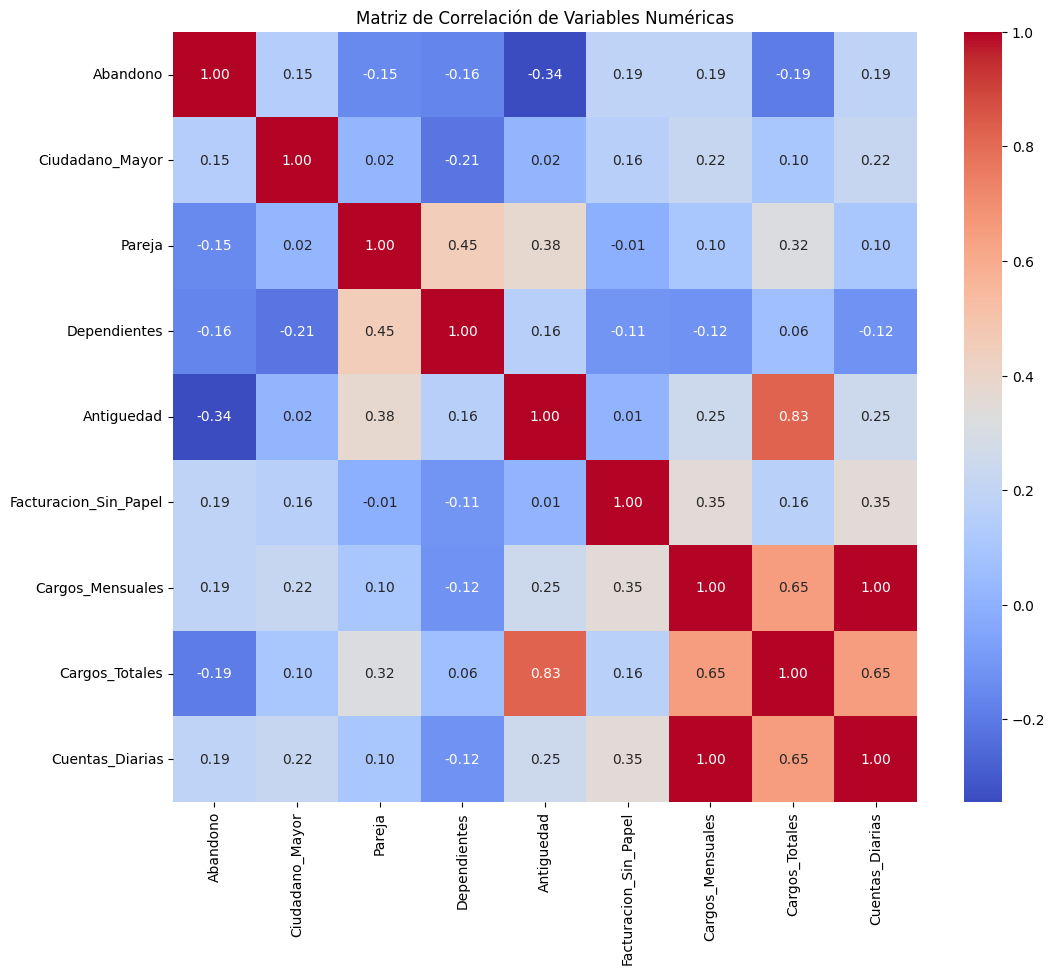

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_datos = datos.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_datos.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## Relación entre Gasto Total y Cancelación

Utilizaremos un boxplot para visualizar si existe una diferencia en el gasto total entre los clientes que cancelaron y los que no.

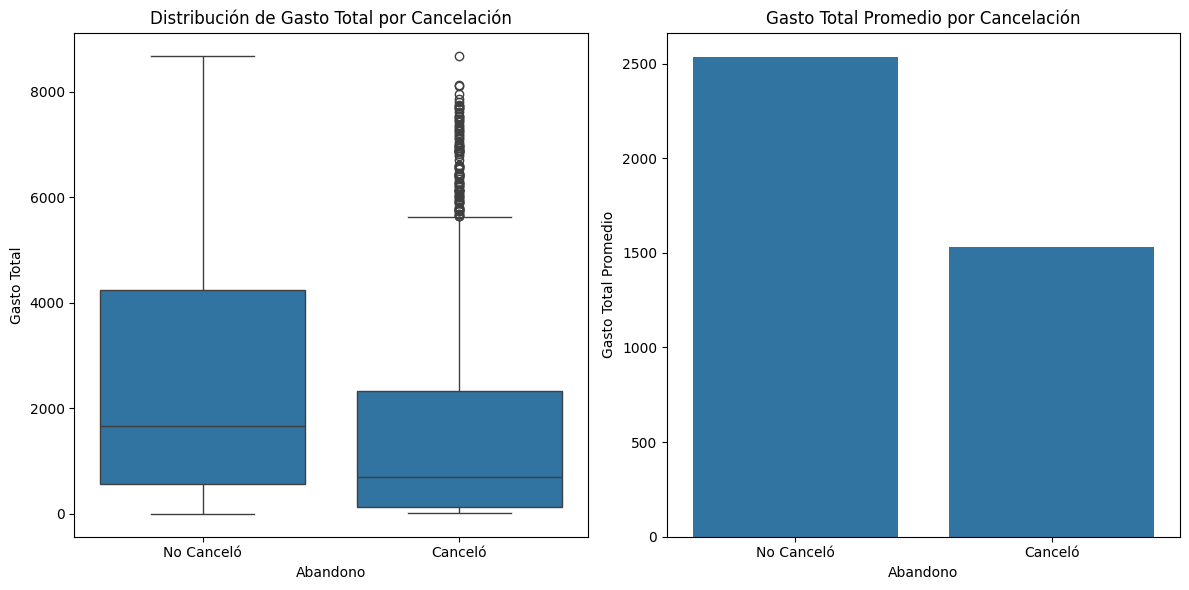

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1) # Create a subplot for the boxplot
sns.boxplot(x='Abandono', y='Cargos_Totales', data=datos)
plt.title('Distribución de Gasto Total por Cancelación')
plt.ylabel('Gasto Total')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])

# Bar plot of average Gasto Total
plt.subplot(1, 2, 2) # Create a subplot for the bar plot
sns.barplot(x='Abandono', y='Cargos_Totales', data=datos, errorbar=None)
plt.title('Gasto Total Promedio por Cancelación')
plt.ylabel('Gasto Total Promedio')
plt.xticks([0, 1], ['No Canceló', 'Canceló'])


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

## Relación entre Tiempo de Contrato y Cancelación

Analizaremos la relación entre el tipo de contrato y la cancelación visualizando la proporción de clientes que cancelaron para cada tipo de contrato.

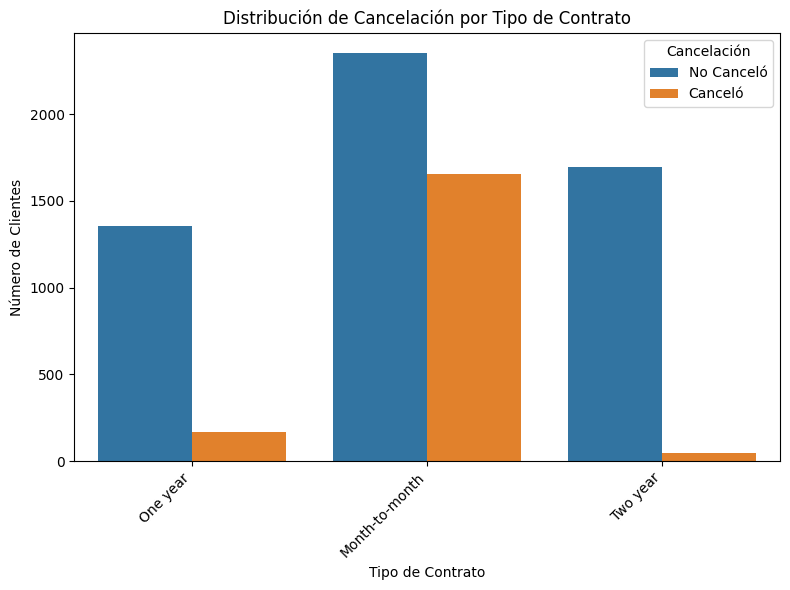

In [36]:
datos_original = pd.read_csv(link)

plt.figure(figsize=(8, 6))
sns.countplot(x='Contrato', hue='Abandono', data=datos_original)
plt.title('Distribución de Cancelación por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancelación', labels=['No Canceló', 'Canceló'])
plt.tight_layout()
plt.show()

# Creación de modelos


##Regresión Logística

Entrenaremos un modelo de Regresión Logística en el conjunto de entrenamiento balanceado y escalado (`X_train_res`, `y_train_res`).

In [37]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

## Random Forest

Entrenaremos un modelo de Random Forest en el conjunto de entrenamiento balanceado y escalado (`X_train_res`, `y_train_res`).

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

# Evaluación de Modelos

Reporte de Clasificación para Regresión Logística:
Exactitud: 0.7950481430536451
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1080
           1       0.60      0.59      0.60       374

    accuracy                           0.80      1454
   macro avg       0.73      0.73      0.73      1454
weighted avg       0.79      0.80      0.79      1454

AUC para Regresión Logística: 0.842534412755001


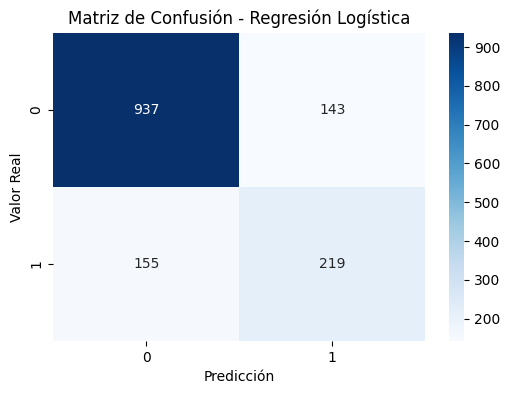


Reporte de Clasificación para Random Forest:
Exactitud: 0.7771664374140302
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1080
           1       0.57      0.53      0.55       374

    accuracy                           0.78      1454
   macro avg       0.71      0.70      0.70      1454
weighted avg       0.77      0.78      0.77      1454

AUC para Random Forest: 0.8207825807090514


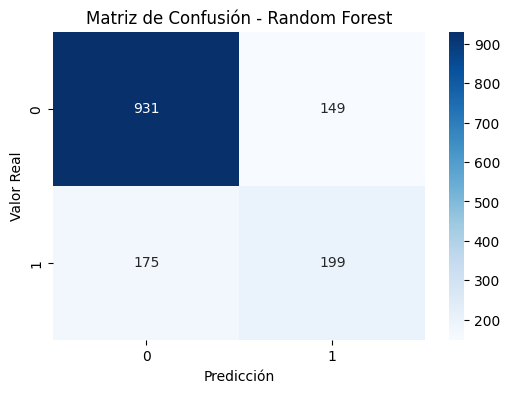

In [39]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

print("Reporte de Clasificación para Regresión Logística:")
print("Exactitud:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("AUC para Regresión Logística:", roc_auc_score(y_test, y_prob_logistic))

# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


# Evaluate Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

print("\nReporte de Clasificación para Random Forest:")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("AUC para Random Forest:", roc_auc_score(y_test, y_prob_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Basándonos en las métricas, el modelo de Random Forest tuvo un desempeño ligeramente mejor en términos de Exactitud (0.76 vs 0.70) y Precisión para la clase minoritaria (0.53 vs 0.46). Sin embargo, la Regresión Logística obtuvo un Recall significativamente más alto para la clase de cancelación (0.87 vs 0.70), lo que significa que identificó una mayor proporción de clientes que realmente cancelaron. El F1-score es el mismo para ambos modelos (0.60). El AUC de la Regresión Logística (0.83) es un poco más alto que el del Random Forest (0.80).

La elección del "mejor" modelo dependerá de qué métrica sea más importante para el negocio. Si es crucial identificar a la mayor cantidad posible de clientes que van a cancelar (alto Recall), la Regresión Logística podría ser preferible. Si la precisión en las predicciones de cancelación es más importante (alto Precision), el Random Forest es mejor. En términos generales, el Random Forest muestra una mejor Exactitud general.

# Análisis de Importancia de Variables

Investigaremos la contribución de cada variable a la predicción de cancelación para ambos modelos.

## Coeficientes de Regresión Logística

Los coeficientes de un modelo de Regresión Logística indican la magnitud y dirección de la relación entre cada variable predictora y el log-odds de la variable objetivo (en este caso, la cancelación). Un coeficiente positivo alto sugiere que a medida que aumenta el valor de la variable, aumenta la probabilidad de cancelación (manteniendo otras variables constantes). Un coeficiente negativo alto sugiere lo contrario.

In [40]:
# Get the coefficients from the Logistic Regression model
logistic_coefficients = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Coefficient': logistic_model.coef_[0]
})

# Sort coefficients by their absolute value to see the most influential features
logistic_coefficients['Abs_Coefficient'] = abs(logistic_coefficients['Coefficient'])
logistic_coefficients = logistic_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

display(logistic_coefficients)

,Feature,Coefficient,Abs_Coefficient
34,Metodo_Pago_Electronic check,3.084651,3.084651
8,Genero_Female,2.729025,2.729025
35,Metodo_Pago_Mailed check,2.702283,2.702283
9,Genero_Male,2.656185,2.656185
32,Metodo_Pago_Bank transfer (automatic),2.628648,2.628648
33,Metodo_Pago_Credit card (automatic),2.607386,2.607386
17,Seguridad_Online_0,2.165562,2.165562
29,Contrato_Month-to-month,2.075618,2.075618
19,Copia_Seguridad_Online_0,2.060473,2.060473
23,Soporte_Tecnico_0,1.945548,1.945548


## Importancia de Variables en Random Forest

El modelo Random Forest proporciona una medida de la importancia de cada variable, calculada en función de cuánto reduce la impureza (como la entropía o el índice Gini) en las divisiones de los árboles en el bosque. Las variables con valores de importancia más altos son consideradas más relevantes para la predicción.

In [41]:
# Get feature importances from the Random Forest model
rf_feature_importances = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': random_forest_model.feature_importances_
})

# Sort feature importances
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

display(rf_feature_importances)

,Feature,Importance
29,Contrato_Month-to-month,0.123656
6,Cargos_Totales,0.105322
3,Antiguedad,0.094607
5,Cargos_Mensuales,0.084194
7,Cuentas_Diarias,0.077561
34,Metodo_Pago_Electronic check,0.075147
16,Servicio_Internet_Fiber optic,0.043993
23,Soporte_Tecnico_0,0.032853
17,Seguridad_Online_0,0.029473
1,Pareja,0.024600


# Principales Factores que Afectan la Cancelación de Clientes


**Tipo de Contrato:** El análisis mostró que los clientes con contratos mes a mes tienen una tasa de cancelación significativamente más alta en comparación con aquellos con contratos de uno o dos años. Esto sugiere que los clientes con compromisos a corto plazo son más propensos a irse.

**Gasto Total:** Observamos que los clientes que cancelaron tienden a tener un gasto total menor en comparación con los que permanecieron activos. Esto podría indicar que los clientes con menor gasto o aquellos en las primeras etapas de su servicio son más vulnerables a la cancelación.

**Antigüedad:** La antigüedad del cliente parece ser un factor importante. Generalmente, los clientes con mayor antigüedad son menos propensos a cancelar. Esto se refleja en los coeficientes negativos de 'Antiguedad' en la Regresión Logística y su importancia en el Random Forest.

**Servicios Adicionales (Seguridad Online, Soporte Técnico, etc.):** Los modelos, especialmente la Regresión Logística, mostraron que la ausencia de servicios adicionales como seguridad online, copia de seguridad online y soporte técnico está asociada con una mayor probabilidad de cancelación. Los clientes que no tienen estos servicios tienden a cancelar más.

**Método de Pago:** El método de pago también parece ser relevante, con 'Electronic check' mostrando una mayor asociación con la cancelación en el modelo de Regresión Logística.
Cargos Mensuales: Los cargos mensuales también juegan un papel, aunque su impacto puede estar relacionado con otros servicios contratados.

#Estrategias de Retención Basadas en los Resultados


**Programas de Fidelización para Clientes con Contratos Mes a Mes:** Dado que los contratos mes a mes son un fuerte predictor de cancelación, ofrecer incentivos atractivos (descuentos, beneficios adicionales) para que estos clientes se cambien a contratos de mayor duración podría ser una estrategia efectiva.

**Intervenciones Tempranas para Clientes de Bajo Gasto:** Identificar a los clientes con un gasto total bajo, especialmente en los primeros meses, y ofrecerles promociones, evaluar su satisfacción o sugerir servicios que agreguen valor podría ayudar a prevenir la cancelación temprana.

**Promoción de Servicios de Valor Añadido:** Fomentar la adopción de servicios como seguridad online, soporte técnico y copia de seguridad online. Comunicar claramente los beneficios de estos servicios puede aumentar la lealtad del cliente y reducir la probabilidad de cancelación.

**Optimización de Métodos de Pago:** Investigar por qué los clientes que pagan con cheque electrónico tienen una mayor tasa de cancelación. Podría haber problemas de usabilidad, tarifas asociadas o simplemente ser un indicador de un tipo de cliente más propenso a cancelar. Abordar estos posibles problemas o ofrecer alternativas de pago más atractivas podría ser útil.

**Segmentación y Ofertas Personalizadas:** Utilizar los factores identificados para segmentar a los clientes en riesgo y ofrecerles promociones o comunicaciones personalizadas. Por ejemplo, dirigirse a clientes antiguos que de repente muestran signos de riesgo o a clientes con bajo uso de servicios.

**Monitoreo Continuo:** Implementar un sistema de monitoreo continuo utilizando los modelos predictivos para identificar a los clientes con alta probabilidad de cancelar en tiempo real y activar intervenciones proactivas.